# DBSCAN clustering on IRIS Dataset using PCA by Mr. Harshit Dawar!

In [34]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import seaborn as sns

## Data Preprocessing

In [2]:
iris_data, labels = load_iris(return_X_y=True)

In [4]:
iris_data.shape

(150, 4)

In [5]:
labels.shape

(150,)

In [6]:
iris_data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [7]:
labels[:5]

array([0, 0, 0, 0, 0])

In [19]:
np.unique(labels)

array([0, 1, 2])

## Applyting PCA for Dimensionality Reduction

In [8]:
# Reducing the Dimensions of the data
dim_reducer = PCA(n_components = 2)

In [9]:
dim_reduced_data = dim_reducer.fit_transform(iris_data)

In [10]:
dim_reduced_data.shape

(150, 2)

## Density Based Clustering Starts

In [15]:
# Applying the Density Based Clustering
clusterizer = DBSCAN(eps = 0.5, min_samples = 5)

In [17]:
# Fitting the data as well getting the predictions
predictions = clusterizer.fit_predict(dim_reduced_data)

In [18]:
np.unique(predictions, return_counts = True)

(array([-1,  0,  1]), array([ 7, 50, 93]))

NameError: name 'center_of_x' is not defined

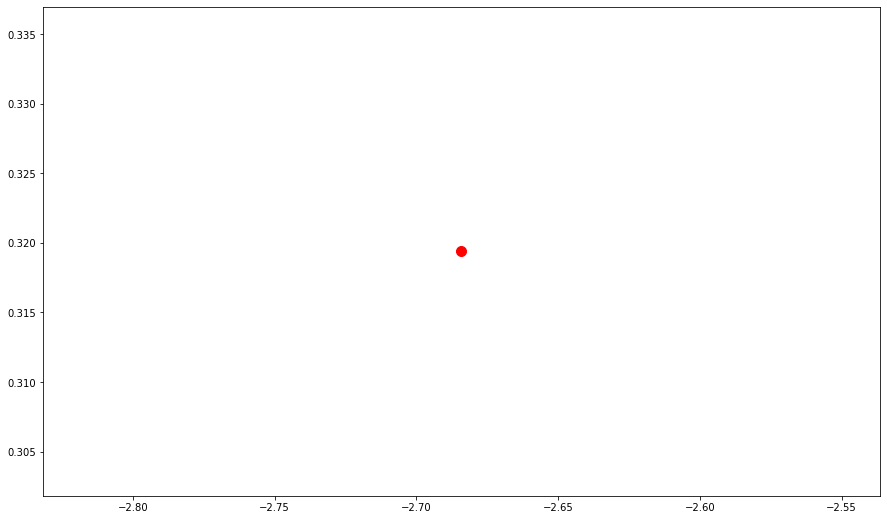

In [57]:
# Approach 1 of plotting the figure
plt.figure(figsize = (15, 9))
for i in range(predictions.shape[0]):
    if predictions[i] == 0:
        plt.scatter(dim_reduced_data[i, 0],
                    dim_reduced_data[i, 1],
                    c = "r",
                    marker = "o",
                    label = "Cluster 1",
                    s = 100)
        
    elif predictions[i] == 1:
        plt.scatter(dim_reduced_data[i, 0],
                    dim_reduced_data[i, 1],
                    c = "g",
                    marker = "*",
                    label = "Cluster 2",
                    s = 100)

    elif predictions[i] == -1:
        plt.scatter(dim_reduced_data[i, 0],
                    dim_reduced_data[i, 1],
                    c = "brown",
                    marker = "+", 
                    label = "Outliers",
                    s = 100)
    else:
        pass
plt.title("DBSCAN output showcasing Noise and 2 Clusters", size = 15)
plt.show()

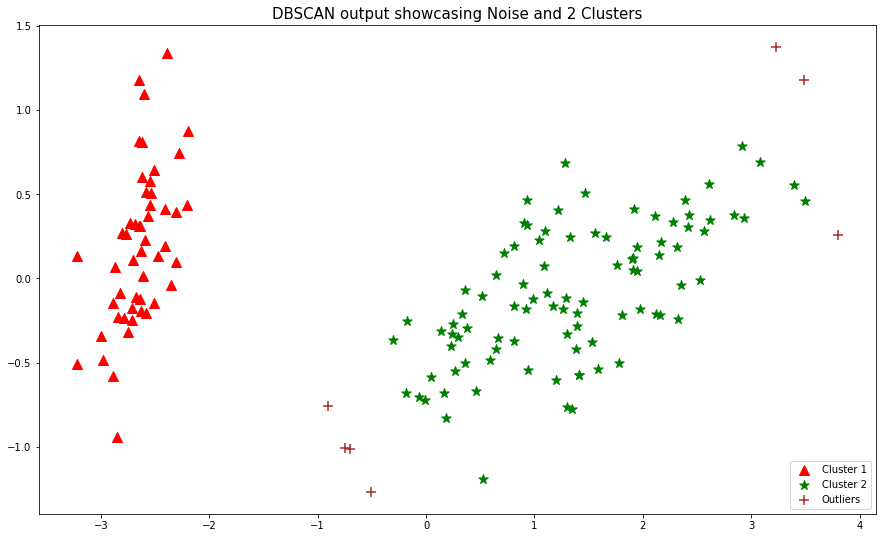

In [58]:
# Approach 2 of plotting the figure
plt.figure(figsize = (15, 9))
plt.scatter(dim_reduced_data[predictions == 0, 0],
            dim_reduced_data[predictions == 0, 1],
            c = "r",
            marker = "^",
            label = "Cluster 1",
            s = 100)
        
plt.scatter(dim_reduced_data[predictions == 1, 0],
            dim_reduced_data[predictions == 1, 1],
            c = "g",
            marker = "*",
            label = "Cluster 2",
            s = 100)

plt.scatter(dim_reduced_data[predictions == -1, 0],
            dim_reduced_data[predictions == -1, 1],
            c = "brown",
            marker = "+",
            label = "Outliers",
            s = 100)

plt.legend(loc = "lower right")
plt.title("DBSCAN output showcasing Noise and 2 Clusters", size = 15)
plt.show()

# Congratulations, you have understood how to use DBSCAN to perform the Clustering!